In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile 
from pathlib import Path
import os
from tqdm import tqdm
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import aligner, register, onlypores, reslicer, io

# Load

In [6]:
filename = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\02_XCT_data\Juan Ignacio\probetas\4\volume_eq_rotated')

data = io.load_tif(filename)

Progress: 100%|██████████| 3224/3224 [00:40<00:00, 79.38it/s]


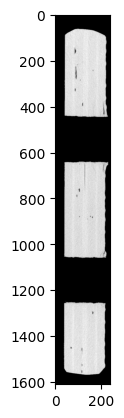

In [11]:
plt.imshow(data[1000,:,:], cmap='gray')

# Reslice

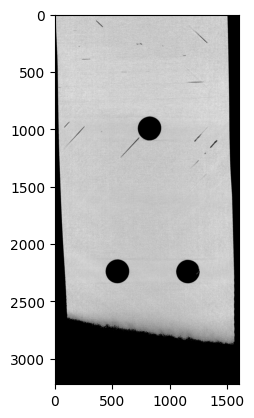

In [12]:
frontal = reslicer.rotate_90(data)

frontal = reslicer.reslice(frontal,'Top')

plt.imshow(frontal[50,:,:], cmap='gray')

# Get angles

In [13]:
angle_yz,angle_xz = register.YZ_XZ_inclination(frontal,'XCT',1)

print('Angle YZ: ', angle_yz)
print('Angle XZ: ', angle_xz)

Finding surface points: 100%|██████████| 4774524/4774524 [03:46<00:00, 21093.98it/s]


Angle YZ:  1.0165781306141919
Angle XZ:  -0.10786365797693982


# Rotate

In [14]:
rotated_frontal = aligner.rotate_volume_axis(frontal,'x',angle_yz)

Rotating around x-axis: 100%|██████████| 1610/1610 [03:35<00:00,  7.46it/s]


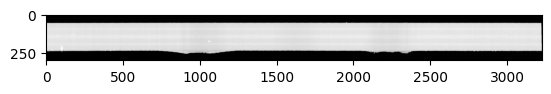

In [18]:
plt.imshow(rotated_frontal.max(axis=2), cmap='gray')

In [21]:
rotated_frontal = aligner.rotate_volume_axis(rotated_frontal,'y',angle_xz)

Rotating around y-axis: 100%|██████████| 3228/3228 [00:40<00:00, 80.30it/s] 


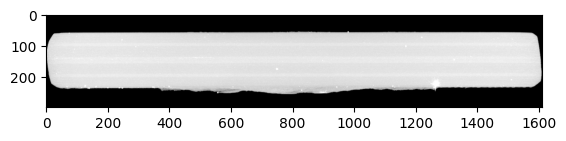

In [22]:
plt.imshow(rotated_frontal.max(axis=1), cmap='gray')

In [23]:
angle_yz_2,angle_xz_2 = register.YZ_XZ_inclination(rotated_frontal,'XCT',1)

print('Angle YZ: ', angle_yz_2)
print('Angle XZ: ', angle_xz_2)

Finding surface points: 100%|██████████| 4778866/4778866 [04:09<00:00, 19176.54it/s]


Angle YZ:  0.006239498299890912
Angle XZ:  -0.01205315664693158


# Reslice back

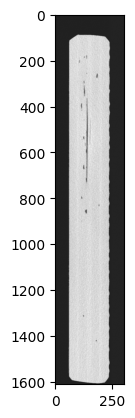

In [24]:
original = reslicer.reslice(rotated_frontal,'Bottom')

original = reslicer.rotate_90(original, False)

plt.imshow(original[50,:,:], cmap='gray')

# save the volume

In [33]:
save_path = filename.parent / 'aligned_volume.tif'
io.save_tif(save_path, original)

# main function

In [34]:
volume_main = aligner.main(data)

Rotating around y-axis: 100%|██████████| 3228/3228 [00:11<00:00, 292.54it/s]


computing otsu
Bounding box coordinates: zmin=1, zmax=3226, ymin=1, ymax=1609, xmin=55, xmax=257


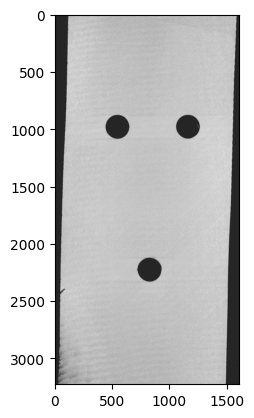

In [44]:
plt.imshow(volume_main[:,:,7], cmap='gray')